In [6]:
import pandas as pd
import numpy as np
import requests
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install bs4

In [7]:
from bs4 import BeautifulSoup

In [4]:
url = "https://www.zigwheels.com/used-car/Hyderabad"

In [5]:
url

'https://www.zigwheels.com/used-car/Hyderabad'

In [6]:
page = requests.get(url)

In [7]:
page

<Response [200]>

In [8]:
page.text

'<!doctype html>\n<html>\n<head>\n<!-- Responsive and mobile friendly stuff -->\n<!--[if IE 8]>\r\n           \r\n           <![endif]-->\n<link rel="image_src" href="https://images.zigcdn.com/images/revamp/zw_l.png"/>\n<meta name="viewport" content="width=device-width,initial-scale=1,maximum-scale=5,user-scalable=1"/>\n<meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>\n<link rel="canonical" href="https://www.zigwheels.com/used-car/Hyderabad"/>\n<title>Used Cars in Hyderabad - 1264 Second Hand Cars for Sale in Hyderabad </title>\n<meta name="Description" content="Buy Used Cars in Hyderabad from zigwheels. Find out certified second hand cars at best price in Hyderabad from Maruti, Honda, Tata, Toyota, Hyundai, Ford, etc. Get assistence in Finance and quick RC transfer. "/>\n<meta name="Keywords" content="Used Cars in Hyderabad - Find used cars for sale in Hyderabad by make Maruti, Honda, Toyota, Hyundai, Tata, Ford, etc. Buy Used cars in Hyderabad at Zigwheels.com">\n

In [9]:
soup = BeautifulSoup(page.text)

In [10]:
soup

<!DOCTYPE html>
<html>
<head>
<!-- Responsive and mobile friendly stuff -->
<!--[if IE 8]>
           
           <![endif]-->
<link href="https://images.zigcdn.com/images/revamp/zw_l.png" rel="image_src"/>
<meta content="width=device-width,initial-scale=1,maximum-scale=5,user-scalable=1" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<link href="https://www.zigwheels.com/used-car/Hyderabad" rel="canonical"/>
<title>Used Cars in Hyderabad - 1264 Second Hand Cars for Sale in Hyderabad </title>
<meta content="Buy Used Cars in Hyderabad from zigwheels. Find out certified second hand cars at best price in Hyderabad from Maruti, Honda, Tata, Toyota, Hyundai, Ford, etc. Get assistence in Finance and quick RC transfer. " name="Description"/>
<meta content="Used Cars in Hyderabad - Find used cars for sale in Hyderabad by make Maruti, Honda, Toyota, Hyundai, Tata, Ford, etc. Buy Used cars in Hyderabad at Zigwheels.com" name="Keywords"/>
<meta content="Use

In [32]:
a = soup.find_all("a",class_="fnt-22 zm-cmn-colorBlack n zw-sr-headingPadding clickGtm saveslotno")
#a = soup.find_all("a",class_="fnt-22 zm-cmn-colorBlack n zw-sr-headingPadding clickGtm saveslotno")
a[0].text.split()[0]

'Toyota'

In [12]:
Brand=[]
for i in a:
    Brand.append(i.text.split()[0])
len(Brand)

12

In [106]:
m = soup.find_all("a",class_="fnt-22 zm-cmn-colorBlack n zw-sr-headingPadding clickGtm saveslotno")
" ".join(m[0].text.split())

'Toyota Fortuner 2011-2016 2.5 4x2 MT TRD Sportivo'

In [107]:
Model=[]
for i in m:
    Model.append(" ".join(i.text.split()))
len(Model)
    

12

In [36]:
p= soup.find_all("span",class_="zw-cmn-price n pull-left mt-3")
p[0].text.split()[1]

'25.00'

In [37]:
Price=[]
for i in p:
    Price.append(i.text.split()[1])

In [38]:
Price

['25.00',
 '4.20',
 '3.99',
 '3.20',
 '50,000',
 '2.60',
 '1.50',
 '2.85',
 '6.75',
 '2.45',
 '6.50',
 '3.50']

In [39]:
len(Price)

12

In [40]:
k= soup.find_all("ul",class_="zw-sr-specification mt-30")
k[0].text

'DieselFuel60,000 Kms KMS2016 Model Model'

In [41]:
import re

In [75]:
FuelType=[]
for i in k:
    a=i.text
    b=re.findall(r'^\w[a-z]+',a)
    if len(b)>0:
        
        FuelType.append(b[0])

In [76]:
FuelType.extend([np.nan])

In [77]:
len(FuelType)

12

In [78]:
d=soup.find_all("ul",class_="zw-sr-specification mt-30")
d[0].text

'DieselFuel60,000 Kms KMS2016 Model Model'

In [79]:
Km=[]
for i in d:
    a=i.text
    b=re.findall(r'\d+,\d+',a)
    if len(b)>0:
        Km.append(b[0])

In [80]:
len(Km)

12

In [81]:
e=soup.find_all("ul",class_="zw-sr-specification mt-30")
e[0].text

'DieselFuel60,000 Kms KMS2016 Model Model'

In [82]:
Year=[]
for i in d:
    a=i.text
    b=re.findall(r'\d{4}',a)
    if len(b)>0:
        Year.append(b[0])

In [83]:
len(Year)

12

In [87]:
df= pd.DataFrame({
    "Brand":Brand[:11],
    "Models":Model[:11],
    "Price":Price[:11],
    "Fuel_type":FuelType[:11],
    "km_run":km[:11],
    "year_model":Year[:11]
})

In [88]:
df

,Brand,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Toyota,25.00,Diesel,"60,000",2016
1,Hyundai,Hyundai,4.20,Petrol,"50,000",2015
2,Mercedes-Benz,Hyundai,3.99,Diesel,"50,000",2017
3,Hyundai,Hyundai,3.20,Petrol,"50,000",2012
4,Mahindra,Maruti,"50,000",Diesel,"80,000",2008
5,Mahindra,Hyundai,2.60,Petrol,"90,000",2014
6,Renault,Maruti,1.50,Petrol,"70,000",2012
7,Maruti,Maruti,2.85,Petrol,"52,000",2015
8,Honda,Honda,6.75,Petrol,"33,000",2018
9,Honda,Hyundai,2.45,Diesel,"57,182",2012


In [89]:
import requests
from bs4 import BeautifulSoup

In [90]:
import re

In [108]:
Brand = []
Model=[]
Price = []
Type1=[]
km=[]
Year=[]

list_cities=['Hyderabad','Secunderabad','Delhi','Mumbai','Bangalore','Pune','Chennai','Agra','Hathras','Kolkata','Ahmedabad','Jaipur','Coimbatore','Gurgaon','Noida','Thane','Lucknow','Chandigarh','Navi-mumbai','Hathras','Agra','Ghaziabad','Faridabad','Hosur','Krishnagiri','Howrah','Mira-Road','Kalyan','Kengari','Hoskote','Kolar','Anekal','Palakkad','Gandhinagar','Faridabad','Palwal','Tirupur','Erode',
             'Gurgaon','Patancheru','Nagole','Ibrahimpatnam','Kelambakkam','Chingleput','Kancheepuram','Arakkonam','Thiruvallur','Barasat','Haldia','Nadia','Hooghly','Nadiad','Anand','Vadodara','Kalol','Jaipur','Tirupur','Barabanki']
for i in list_cities:
    url = "https://www.zigwheels.com/used-car/"+i
    #print(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    
    #brand = []
    a = soup.find_all("a",class_="fnt-22 zm-cmn-colorBlack n zw-sr-headingPadding clickGtm saveslotno")
    for i in a:
        Brand.append(i.text.split()[0])
    m = soup.find_all("a",class_="fnt-22 zm-cmn-colorBlack n zw-sr-headingPadding clickGtm saveslotno")
    for i in m:
        Model.append(" ".join(i.text.split()))
    #for i in m:
   #Model.append(" ".join(i.text.split()[1:]))
    p= soup.find_all("span",class_="zw-cmn-price n pull-left mt-3")
    for i in p:
        Price.append(i.text.split()[1])
    k= soup.find_all("ul",class_="zw-sr-specification mt-30")
    for i in k:
        a=i.text
        b=re.findall(r'^\w[a-z]+',a)
        if len(b)>0:
            Type1.append(b[0])

    d=soup.find_all("ul",class_="zw-sr-specification mt-30")
    for i in d:
        a=i.text
        b=re.findall(r'\d+,\d+',a)
        if len(b)>0:
            km.append(b[0])
    e=soup.find_all("ul",class_="zw-sr-specification mt-30")
    for i in d:
        a=i.text
        b=re.findall(r'\d{4}',a)
        if len(b)>0:
            Year.append(b[0])
    

In [109]:
len(Brand)

587

In [110]:
len(Model) 

587

In [111]:
len(Price)

587

In [112]:
len(Type1)

575

In [113]:
Type1.extend([np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan])

In [114]:
len(Type1)

587

In [120]:
len(km)

604

In [121]:
km.extend([np.nan,np.nan,np.nan,np.nan,np.nan])

In [119]:
len(km)

604

In [122]:
len(Year)

587

In [123]:
df1 = pd.DataFrame({"Brands":Brand[:587],"Models":Model[:587],"Price":Price[:587],'Fuel_type':Type1[:587],'km_run':km[:587],'year_model':Year[:587]})
df1.to_csv('UsedCars.csv', index=True, encoding='utf-8')

In [124]:
  df1

,Brands,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Porsche Macan S,93.00,Petrol,"3,800",2022
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,"3,800",2016
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.80,Diesel,"11,000",2022
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,"13,966",2016
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.80,Diesel,"12,540",2021
...,...,...,...,...,...,...
582,Maruti,Maruti Alto K10 2014-2020 LXI,2.85,NaN,NaN,2015
583,Honda,Honda Amaze 2016-2021 V Petrol BSIV,6.75,NaN,NaN,2018
584,Hyundai,Hyundai i10 Magna 1.2 iTech SE,2.45,NaN,NaN,2012
585,Ford,Ford Ecosport 2015-2021 1.5 Diesel Trend BSIV,6.50,NaN,NaN,2017


In [125]:
df1 = pd.read_csv('UsedCars.csv')

In [126]:
df1

,Unnamed: 0,Brands,Models,Price,Fuel_type,km_run,year_model
0,0,Porsche,Porsche Macan S,93.00,Petrol,"3,800",2022
1,1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,"3,800",2016
2,2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.80,Diesel,"11,000",2022
3,3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,"13,966",2016
4,4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.80,Diesel,"12,540",2021
...,...,...,...,...,...,...,...
582,582,Maruti,Maruti Alto K10 2014-2020 LXI,2.85,NaN,NaN,2015
583,583,Honda,Honda Amaze 2016-2021 V Petrol BSIV,6.75,NaN,NaN,2018
584,584,Hyundai,Hyundai i10 Magna 1.2 iTech SE,2.45,NaN,NaN,2012
585,585,Ford,Ford Ecosport 2015-2021 1.5 Diesel Trend BSIV,6.50,NaN,NaN,2017


In [127]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  587 non-null    int64 
 1   Brands      587 non-null    object
 2   Models      587 non-null    object
 3   Price       587 non-null    object
 4   Fuel_type   575 non-null    object
 5   km_run      582 non-null    object
 6   year_model  587 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 32.2+ KB


In [128]:
df1.drop(df1.filter(regex="Unnamed"),axis=1, inplace=True)

In [129]:
df1

,Brands,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Porsche Macan S,93.00,Petrol,"3,800",2022
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,"3,800",2016
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.80,Diesel,"11,000",2022
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,"13,966",2016
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.80,Diesel,"12,540",2021
...,...,...,...,...,...,...
582,Maruti,Maruti Alto K10 2014-2020 LXI,2.85,NaN,NaN,2015
583,Honda,Honda Amaze 2016-2021 V Petrol BSIV,6.75,NaN,NaN,2018
584,Hyundai,Hyundai i10 Magna 1.2 iTech SE,2.45,NaN,NaN,2012
585,Ford,Ford Ecosport 2015-2021 1.5 Diesel Trend BSIV,6.50,NaN,NaN,2017


In [130]:
Year_model=[]
for i in df1['year_model']:
    Year_model.append(int(i))
df1['year_model']=Year_model

In [131]:
df1.dtypes

Brands        object
Models        object
Price         object
Fuel_type     object
km_run        object
year_model     int64
dtype: object

In [132]:
df1['km_run']=df1['km_run'].str.replace(',','')

In [133]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587 entries, 0 to 586
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brands      587 non-null    object
 1   Models      587 non-null    object
 2   Price       587 non-null    object
 3   Fuel_type   575 non-null    object
 4   km_run      582 non-null    object
 5   year_model  587 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 27.6+ KB


In [134]:
df1

,Brands,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Porsche Macan S,93.00,Petrol,3800,2022
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,3800,2016
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.80,Diesel,11000,2022
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,13966,2016
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.80,Diesel,12540,2021
...,...,...,...,...,...,...
582,Maruti,Maruti Alto K10 2014-2020 LXI,2.85,NaN,NaN,2015
583,Honda,Honda Amaze 2016-2021 V Petrol BSIV,6.75,NaN,NaN,2018
584,Hyundai,Hyundai i10 Magna 1.2 iTech SE,2.45,NaN,NaN,2012
585,Ford,Ford Ecosport 2015-2021 1.5 Diesel Trend BSIV,6.50,NaN,NaN,2017


In [135]:
df1['km_run']=df1['km_run'].astype(float)

In [136]:
df1.dropna(inplace=True)
df1

,Brands,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Porsche Macan S,93.00,Petrol,3800.0,2022
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,3800.0,2016
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.80,Diesel,11000.0,2022
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,13966.0,2016
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.80,Diesel,12540.0,2021
...,...,...,...,...,...,...
570,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,29.75,Petrol,60000.0,2018
571,BMW,BMW 3 Series 2014-2019 320d Luxury Line,29.50,Petrol,50000.0,2018
572,Volvo,Volvo V40 Cross Country 2013-2016 D3,16.50,Petrol,50000.0,2014
573,BMW,BMW 5 Series 2013-2017 520d Luxury Line,25.50,Diesel,50000.0,2015


In [137]:
#df1['Price']=df1['Price'].str.replace('.','')

In [178]:
df1['Price']=df1['Price'].str.replace(',','')

In [179]:
df1['Price']=df1['Price'].astype(float)

In [180]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 575 entries, 0 to 574
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brands      575 non-null    object 
 1   Models      575 non-null    object 
 2   Price       575 non-null    float64
 3   Fuel_type   575 non-null    object 
 4   km_run      575 non-null    float64
 5   year_model  575 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 47.6+ KB


In [141]:
df1

,Brands,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Porsche Macan S,93.00,Petrol,3800.0,2022
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,3800.0,2016
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.80,Diesel,11000.0,2022
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,13966.0,2016
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.80,Diesel,12540.0,2021
...,...,...,...,...,...,...
570,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,29.75,Petrol,60000.0,2018
571,BMW,BMW 3 Series 2014-2019 320d Luxury Line,29.50,Petrol,50000.0,2018
572,Volvo,Volvo V40 Cross Country 2013-2016 D3,16.50,Petrol,50000.0,2014
573,BMW,BMW 5 Series 2013-2017 520d Luxury Line,25.50,Diesel,50000.0,2015


In [142]:
df1.isnull().sum()

Brands        0
Models        0
Price         0
Fuel_type     0
km_run        0
year_model    0
dtype: int64

In [143]:
df1.shape

(575, 6)

In [144]:
df1.head(10)

,Brands,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Porsche Macan S,93.00,Petrol,3800.0,2022
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,3800.0,2016
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.80,Diesel,11000.0,2022
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,13966.0,2016
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.80,Diesel,12540.0,2021
5,Mahindra,Mahindra Thar 2010-2015 CRDe AC,7.99,Diesel,26000.0,2015
6,Renault,Renault KWID 1.0 RXT,3.80,Petrol,25000.0,2018
7,Maruti,Maruti Celerio 2017-2021 VXI AMT Optional,5.85,Petrol,23000.0,2018
8,Honda,Honda City 4th Generation i-VTEC V,8.85,Petrol,22000.0,2017
9,Honda,Honda Jazz 2014-2020 1.2 V AT i VTEC,7.25,Petrol,38400.0,2017


In [145]:
df1.tail(2)

,Brands,Models,Price,Fuel_type,km_run,year_model
573,BMW,BMW 5 Series 2013-2017 520d Luxury Line,25.5,Diesel,50000.0,2015
574,Renault,Renault Duster 2016-2019 110PS Diesel RxZ AMT,8.9,Petrol,80000.0,2016


In [146]:
df1.describe()

,Price,km_run,year_model
count,575.000000,575.000000,575.000000
mean,1130.892783,25545.514783,2017.718261
std,9473.061571,26132.451559,4.348567
min,1.000000,100.000000,1991.000000
25%,4.500000,4624.000000,2016.000000
50%,8.500000,13000.000000,2019.000000
75%,19.200000,42000.000000,2021.000000
max,95648.000000,98000.000000,2022.000000


In [147]:
df1

,Brands,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Porsche Macan S,93.00,Petrol,3800.0,2022
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,3800.0,2016
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.80,Diesel,11000.0,2022
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,13966.0,2016
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.80,Diesel,12540.0,2021
...,...,...,...,...,...,...
570,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,29.75,Petrol,60000.0,2018
571,BMW,BMW 3 Series 2014-2019 320d Luxury Line,29.50,Petrol,50000.0,2018
572,Volvo,Volvo V40 Cross Country 2013-2016 D3,16.50,Petrol,50000.0,2014
573,BMW,BMW 5 Series 2013-2017 520d Luxury Line,25.50,Diesel,50000.0,2015


In [148]:
df1['Brands'].nunique()

23

In [149]:
df1['Brands'].unique()

array(['Porsche', 'Hyundai', 'Mercedes-Benz', 'Mahindra', 'Renault',
       'Maruti', 'Honda', 'BMW', 'Kia', 'MG', 'Tata', 'Skoda', 'Jeep',
       'Toyota', 'Volkswagen', 'Ford', 'Jaguar', 'Land', 'Volvo', 'Mini',
       'Audi', 'Chevrolet', 'Nissan'], dtype=object)

In [150]:
df1['Brands'].value_counts()

Maruti           130
Hyundai           89
BMW               49
Mercedes-Benz     49
Tata              36
Honda             35
Renault           26
Mahindra          21
MG                21
Ford              21
Skoda             17
Kia               16
Porsche           14
Toyota            11
Volvo              9
Jeep               8
Volkswagen         7
Chevrolet          5
Land               4
Jaguar             3
Audi               2
Mini               1
Nissan             1
Name: Brands, dtype: int64

In [151]:
df1['Brands'].values

array(['Porsche', 'Hyundai', 'Mercedes-Benz', 'Hyundai', 'Mahindra',
       'Mahindra', 'Renault', 'Maruti', 'Honda', 'Honda', 'Maruti',
       'Mahindra', 'Hyundai', 'Honda', 'Mahindra', 'Hyundai', 'Maruti',
       'BMW', 'Mahindra', 'Renault', 'Mahindra', 'Mahindra', 'Maruti',
       'Mahindra', 'Mercedes-Benz', 'Kia', 'BMW', 'Maruti', 'Porsche',
       'BMW', 'Mercedes-Benz', 'BMW', 'MG', 'Hyundai', 'Mercedes-Benz',
       'Maruti', 'Kia', 'Maruti', 'Hyundai', 'Tata', 'BMW',
       'Mercedes-Benz', 'Tata', 'Hyundai', 'Skoda', 'Honda', 'Tata', 'MG',
       'BMW', 'Porsche', 'Jeep', 'Toyota', 'Mercedes-Benz', 'Skoda',
       'Hyundai', 'MG', 'Tata', 'Kia', 'Mercedes-Benz', 'Mercedes-Benz',
       'Skoda', 'Skoda', 'Maruti', 'Honda', 'Hyundai', 'Tata',
       'Volkswagen', 'Renault', 'Ford', 'Maruti', 'BMW', 'Hyundai', 'BMW',
       'Hyundai', 'Mahindra', 'Maruti', 'Hyundai', 'Renault', 'Honda',
       'Tata', 'BMW', 'Renault', 'Hyundai', 'Hyundai', 'Maruti', 'Tata',
       'Tata', 'Fo

In [152]:
df1['Brands'].values.tolist()

['Porsche',
 'Hyundai',
 'Mercedes-Benz',
 'Hyundai',
 'Mahindra',
 'Mahindra',
 'Renault',
 'Maruti',
 'Honda',
 'Honda',
 'Maruti',
 'Mahindra',
 'Hyundai',
 'Honda',
 'Mahindra',
 'Hyundai',
 'Maruti',
 'BMW',
 'Mahindra',
 'Renault',
 'Mahindra',
 'Mahindra',
 'Maruti',
 'Mahindra',
 'Mercedes-Benz',
 'Kia',
 'BMW',
 'Maruti',
 'Porsche',
 'BMW',
 'Mercedes-Benz',
 'BMW',
 'MG',
 'Hyundai',
 'Mercedes-Benz',
 'Maruti',
 'Kia',
 'Maruti',
 'Hyundai',
 'Tata',
 'BMW',
 'Mercedes-Benz',
 'Tata',
 'Hyundai',
 'Skoda',
 'Honda',
 'Tata',
 'MG',
 'BMW',
 'Porsche',
 'Jeep',
 'Toyota',
 'Mercedes-Benz',
 'Skoda',
 'Hyundai',
 'MG',
 'Tata',
 'Kia',
 'Mercedes-Benz',
 'Mercedes-Benz',
 'Skoda',
 'Skoda',
 'Maruti',
 'Honda',
 'Hyundai',
 'Tata',
 'Volkswagen',
 'Renault',
 'Ford',
 'Maruti',
 'BMW',
 'Hyundai',
 'BMW',
 'Hyundai',
 'Mahindra',
 'Maruti',
 'Hyundai',
 'Renault',
 'Honda',
 'Tata',
 'BMW',
 'Renault',
 'Hyundai',
 'Hyundai',
 'Maruti',
 'Tata',
 'Tata',
 'Ford',
 'Maruti',
 

In [153]:
df1['Brands'].index.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [154]:
t1=df1.select_dtypes(exclude='number')
t1

,Brands,Models,Fuel_type
0,Porsche,Porsche Macan S,Petrol
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,Petrol
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,Diesel
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,Petrol
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,Diesel
...,...,...,...
570,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,Petrol
571,BMW,BMW 3 Series 2014-2019 320d Luxury Line,Petrol
572,Volvo,Volvo V40 Cross Country 2013-2016 D3,Petrol
573,BMW,BMW 5 Series 2013-2017 520d Luxury Line,Diesel


In [155]:
df1.groupby(['Price']).mean()

,km_run,year_model
Price,,
1.00,118.833333,2006.666667
1.05,8166.666667,2021.000000
1.10,39451.200000,2006.800000
1.14,18000.000000,2020.000000
1.15,5000.000000,2019.000000
...,...,...
60000.00,50000.000000,1991.000000
70000.00,46500.000000,2003.000000
80000.00,29750.000000,2005.500000


In [158]:
df1.select_dtypes(include='number')

,Price,km_run,year_model
0,93.00,3800.0,2022
1,6.25,3800.0,2016
2,77.80,11000.0,2022
3,4.95,13966.0,2016
4,18.80,12540.0,2021
...,...,...,...
570,29.75,60000.0,2018
571,29.50,50000.0,2018
572,16.50,50000.0,2014
573,25.50,50000.0,2015


In [169]:
# df1['Price'] =df1[df1['Price']>1000].Price*(1/100000)

In [163]:
df1[df1['Price']>1000].Price*(1/100000)

103    0.95648
235    0.95648
367    0.80000
395    0.80000
407    0.70000
421    0.60000
508    0.88022
563    0.70000
Name: Price, dtype: float64

In [164]:
s=[]
for i in df1['Price']:
    s.append(str(i).replace('95648.0','0.95'))
df1['Price']=s
# df1['Price'].replace('80000.0',"0.0")
# df1['Price'].replace('88022.0',"0.0")
# df1['Price'].replace('70000.0',"0.0")
# df1['Price'].replace('60000.0',"0.0")

In [165]:
s=[]
for i in df1['Price']:
    s.append(str(i).replace('80000.0','0.80'))
df1['Price']=s

In [166]:
s=[]
for i in df1['Price']:
    s.append(str(i).replace('88022.0','0.88'))
df1['Price']=s

In [167]:
s=[]
for i in df1['Price']:
    s.append(str(i).replace('70000.0','0.70'))
df1['Price']=s

In [168]:
s=[]
for i in df1['Price']:
    s.append(str(i).replace('60000.0','0.60'))
df1['Price']=s

In [169]:
df1['Price'].dropna(inplace=True)

In [170]:
df1['Price'].tolist()

['93.0',
 '6.25',
 '77.8',
 '4.95',
 '18.8',
 '7.99',
 '3.8',
 '5.85',
 '8.85',
 '7.25',
 '4.65',
 '10.5',
 '6.25',
 '8.85',
 '4.5',
 '5.4',
 '3.45',
 '36.55',
 '4.5',
 '3.8',
 '4.5',
 '4.5',
 '7.8',
 '4.5',
 '59.6',
 '18.25',
 '65.0',
 '11.1',
 '93.0',
 '94.75',
 '79.0',
 '62.0',
 '17.75',
 '5.6',
 '53.0',
 '12.5',
 '15.95',
 '4.75',
 '11.95',
 '11.45',
 '1.05',
 '71.0',
 '7.8',
 '5.9',
 '12.45',
 '8.75',
 '6.9',
 '17.6',
 '39.45',
 '93.0',
 '32.65',
 '7.25',
 '46.5',
 '15.95',
 '10.25',
 '20.45',
 '24.75',
 '16.75',
 '49.95',
 '77.8',
 '10.75',
 '16.75',
 '3.6',
 '10.4',
 '3.65',
 '7.99',
 '5.35',
 '5.49',
 '9.9',
 '6.6',
 '20.5',
 '6.75',
 '44.75',
 '8.75',
 '12.0',
 '8.9',
 '9.25',
 '8.0',
 '8.4',
 '9.85',
 '1.25',
 '6.9',
 '6.8',
 '11.3',
 '2.67',
 '4.02',
 '6.1',
 '1.1',
 '3.29',
 '5.37',
 '5.91',
 '6.53',
 '4.0',
 '3.5',
 '4.68',
 '3.92',
 '4.0',
 '3.3',
 '4.5',
 '3.5',
 '5.8',
 '1.0',
 '1.25',
 '0.95',
 '1.5',
 '3.63',
 '5.3',
 '5.3',
 '1.99',
 '37.99',
 '18.5',
 '7.9',
 '15.0'

In [171]:
df1

,Brands,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Porsche Macan S,93.0,Petrol,3800.0,2022
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,3800.0,2016
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.8,Diesel,11000.0,2022
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,13966.0,2016
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.8,Diesel,12540.0,2021
...,...,...,...,...,...,...
570,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,29.75,Petrol,60000.0,2018
571,BMW,BMW 3 Series 2014-2019 320d Luxury Line,29.5,Petrol,50000.0,2018
572,Volvo,Volvo V40 Cross Country 2013-2016 D3,16.5,Petrol,50000.0,2014
573,BMW,BMW 5 Series 2013-2017 520d Luxury Line,25.5,Diesel,50000.0,2015


In [182]:
## univariate analysis

1.numerical columns

In [183]:
df1.select_dtypes(include='number')

,Price,km_run,year_model
0,93.00,3800.0,2022
1,6.25,3800.0,2016
2,77.80,11000.0,2022
3,4.95,13966.0,2016
4,18.80,12540.0,2021
...,...,...,...
570,29.75,60000.0,2018
571,29.50,50000.0,2018
572,16.50,50000.0,2014
573,25.50,50000.0,2015


<AxesSubplot:xlabel='Price', ylabel='Density'>

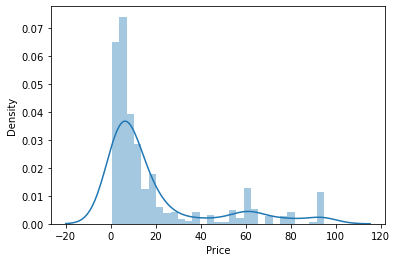

In [184]:
sns.distplot(df1['Price'])

<AxesSubplot:xlabel='km_run', ylabel='Count'>

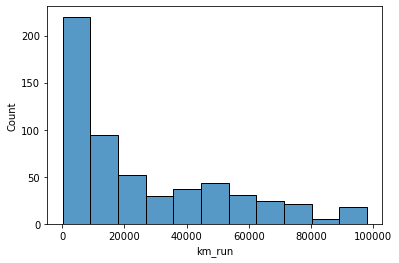

In [185]:
sns.histplot(df1['km_run'])

<AxesSubplot:xlabel='year_model', ylabel='Density'>

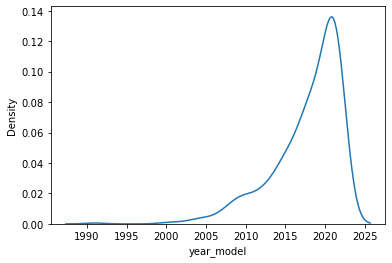

In [186]:
sns.kdeplot(df1['year_model'])

2.categorical columns

In [187]:
df1.select_dtypes(exclude='number')

,Brands,Models,Fuel_type
0,Porsche,Porsche Macan S,Petrol
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,Petrol
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,Diesel
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,Petrol
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,Diesel
...,...,...,...
570,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,Petrol
571,BMW,BMW 3 Series 2014-2019 320d Luxury Line,Petrol
572,Volvo,Volvo V40 Cross Country 2013-2016 D3,Petrol
573,BMW,BMW 5 Series 2013-2017 520d Luxury Line,Diesel


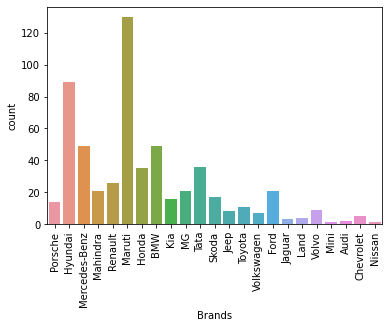

In [202]:
sns.countplot(df1['Brands'])
plt.xticks(rotation=90)
plt.show()

<Figure size 1800x1080 with 0 Axes>

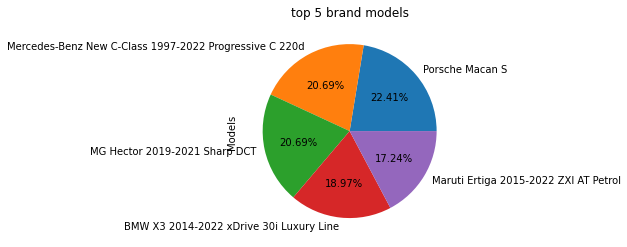

<Figure size 1800x1080 with 0 Axes>

In [203]:
df1["Models"].value_counts()[0:5].plot.pie(autopct="%.2f%%")
plt.title("top 5 brand models")
plt.figure(figsize=(25,15))

In [204]:
## bi_variate

num-num

In [205]:
df1.select_dtypes(include='number')

,Price,km_run,year_model
0,93.00,3800.0,2022
1,6.25,3800.0,2016
2,77.80,11000.0,2022
3,4.95,13966.0,2016
4,18.80,12540.0,2021
...,...,...,...
570,29.75,60000.0,2018
571,29.50,50000.0,2018
572,16.50,50000.0,2014
573,25.50,50000.0,2015


<AxesSubplot:xlabel='year_model', ylabel='Price'>

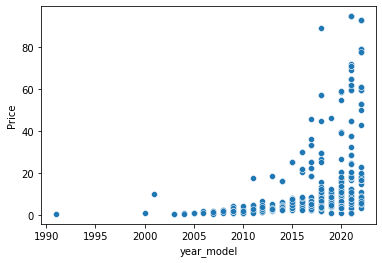

In [207]:
sns.scatterplot(x=df1['year_model'],y=df1['Price'],data=df1)

<AxesSubplot:xlabel='km_run', ylabel='Price'>

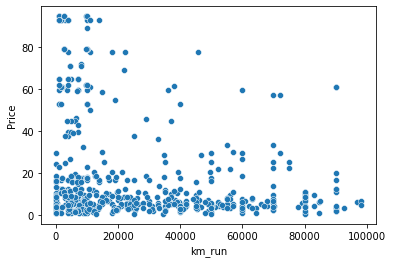

In [208]:
sns.scatterplot(x=df1['km_run'],y=df1['Price'],data=df1)

cat-num

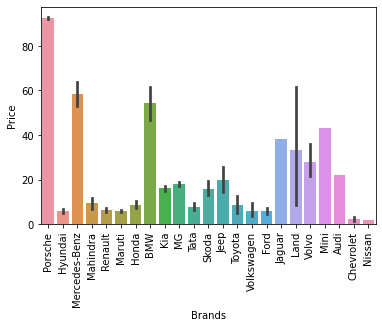

In [212]:
sns.barplot(x=df1['Brands'],y=df1['Price'])
plt.xticks(rotation=90)
plt.show()

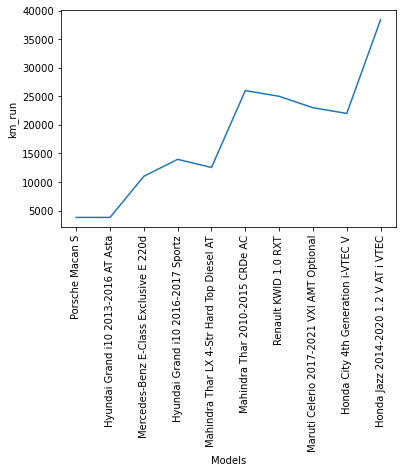

In [219]:
sns.lineplot(x=df1['Models'][0:10],y=df1["km_run"][0:10])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Fuel_type', ylabel='km_run'>

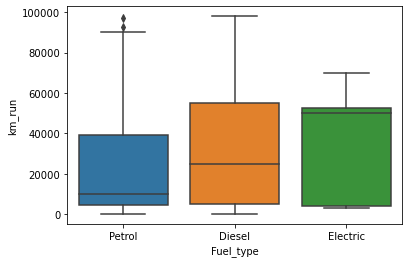

In [221]:
sns.boxplot(x=df1['Fuel_type'],y=df1['km_run'])

cat-cat

In [222]:
# crosstab : which is pandas it takes two categorical colums:
croostab=pd.crosstab(df1['Brands'],df1['Fuel_type'])
croostab # it will gives count only becuase it takes 2 categorical columns


Fuel_type,Diesel,Electric,Petrol
Brands,,,
Audi,1,0,1
BMW,19,0,30
Chevrolet,2,0,3
Ford,10,0,11
Honda,8,2,25
Hyundai,31,1,57
Jaguar,2,0,1
Jeep,2,0,6
Kia,3,1,12


<Figure size 5760x1440 with 0 Axes>

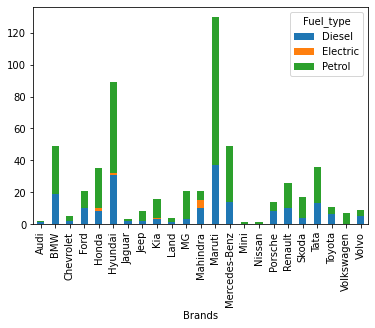

<Figure size 5760x1440 with 0 Axes>

In [223]:
croostab.plot(kind='bar',stacked=True)
plt.figure(figsize=(80,20))

multivariate_analysis

In [224]:
df1.select_dtypes(include='number')

,Price,km_run,year_model
0,93.00,3800.0,2022
1,6.25,3800.0,2016
2,77.80,11000.0,2022
3,4.95,13966.0,2016
4,18.80,12540.0,2021
...,...,...,...
570,29.75,60000.0,2018
571,29.50,50000.0,2018
572,16.50,50000.0,2014
573,25.50,50000.0,2015


<AxesSubplot:>

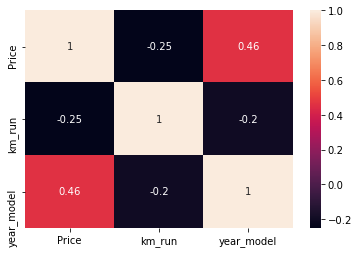

In [225]:
sns.heatmap(df1.corr(),annot=True)

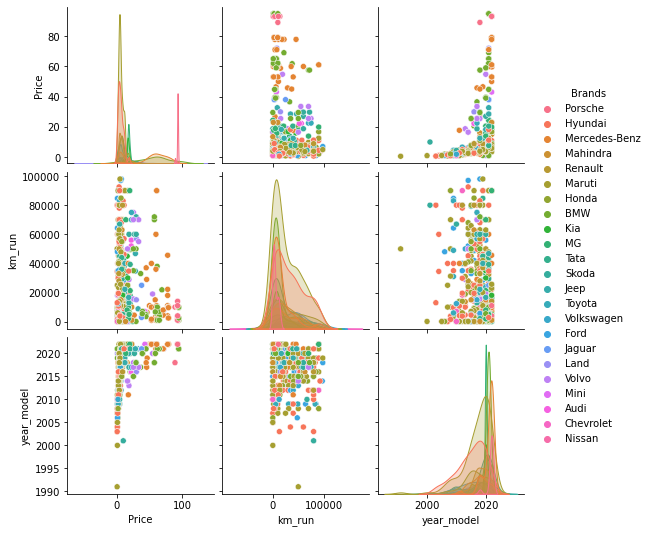

In [227]:
sns.pairplot(data=df1,hue='Brands')

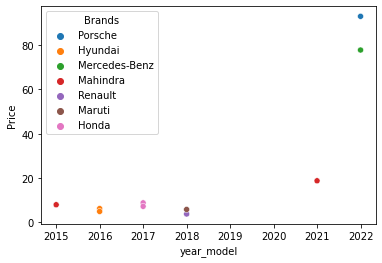

In [232]:
sns.scatterplot(x=df1['year_model'],y=df1['Price'],data=df1,hue=df1['Brands'][0:10])
plt.show()

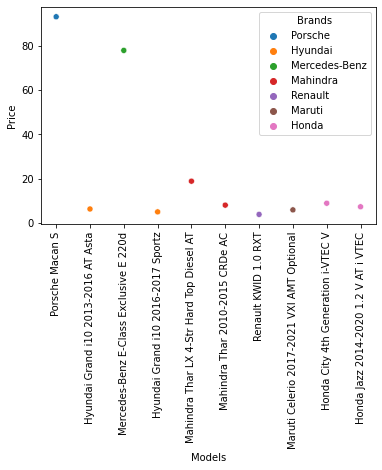

In [234]:
sns.scatterplot(x=df1['Models'],y=df1['Price'],data=df1,hue=df1['Brands'][0:10])
plt.xticks(rotation=90)
plt.show()

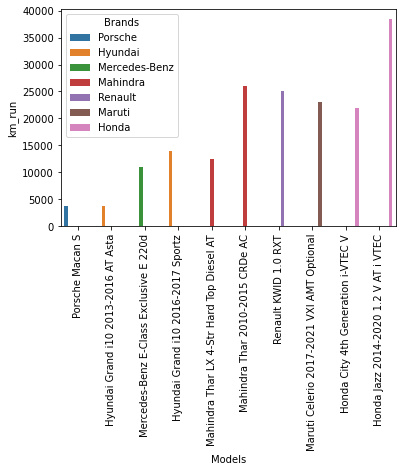

In [238]:
sns.barplot(x=df1['Models'][0:10],y=df1['km_run'][0:10],data=df1,hue=df1['Brands'][0:10])
plt.xticks(rotation=90)
plt.show()

In [239]:
df1

,Brands,Models,Price,Fuel_type,km_run,year_model
0,Porsche,Porsche Macan S,93.00,Petrol,3800.0,2022
1,Hyundai,Hyundai Grand i10 2013-2016 AT Asta,6.25,Petrol,3800.0,2016
2,Mercedes-Benz,Mercedes-Benz E-Class Exclusive E 220d,77.80,Diesel,11000.0,2022
3,Hyundai,Hyundai Grand i10 2016-2017 Sportz,4.95,Petrol,13966.0,2016
4,Mahindra,Mahindra Thar LX 4-Str Hard Top Diesel AT,18.80,Diesel,12540.0,2021
...,...,...,...,...,...,...
570,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,29.75,Petrol,60000.0,2018
571,BMW,BMW 3 Series 2014-2019 320d Luxury Line,29.50,Petrol,50000.0,2018
572,Volvo,Volvo V40 Cross Country 2013-2016 D3,16.50,Petrol,50000.0,2014
573,BMW,BMW 5 Series 2013-2017 520d Luxury Line,25.50,Diesel,50000.0,2015


In [240]:
df1[(df1['year_model']>=2016) & (df1['Price']>=25.40) & 
          (df1['Price']<=30.20)&(df1['km_run']>=60000)].head(10)

,Brands,Models,Price,Fuel_type,km_run,year_model
412,Volvo,Volvo V40 Cross Country D3 Inscription,25.50,Petrol,75000.0,2017
414,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,29.75,Petrol,72000.0,2018
537,Skoda,Skoda Superb Laurin & klement,27.00,Petrol,60000.0,2020
568,Volvo,Volvo V40 Cross Country D3 Inscription,25.50,Diesel,70000.0,2017
570,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,29.75,Petrol,60000.0,2018


In [245]:
x=int(input("Please Enter for Which year_model you are looking for: "))
y=float(input("Please Enter for Which Minimum price  you are looking for:"))
z=float(input("Please Enter for Which Maximum price  you are looking for:"))
a=float(input("Please Enter for KM-driven you are looking for:"))


Please Enter for Which year_model you are looking for: 2016
Please Enter for Which Minimum price  you are looking for:18.00
Please Enter for Which Maximum price  you are looking for:38.00
Please Enter for KM-driven you are looking for:60000


In [246]:
df1[(df1['year_model']>=x) & (df1['Price']>=y) & (df1['Price']<=z)& (df1['km_run']>=a)]

,Brands,Models,Price,Fuel_type,km_run,year_model
411,Toyota,Toyota Innova Crysta 2016-2020 2.8 ZX AT BSIV,22.50,Diesel,70000.0,2017
412,Volvo,Volvo V40 Cross Country D3 Inscription,25.50,Petrol,75000.0,2017
414,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,29.75,Petrol,72000.0,2018
505,MG,MG Hector Plus Sharp CVT,19.90,Petrol,90000.0,2022
537,Skoda,Skoda Superb Laurin & klement,27.00,Petrol,60000.0,2020
564,Skoda,Skoda Octavia 2013-2021 2.0 TDI AT Style,18.75,Diesel,60000.0,2017
566,Volvo,Volvo S90 2016-2021 D4 Inscription BSIV,33.50,Diesel,70000.0,2017
567,Toyota,Toyota Innova Crysta 2016-2020 2.8 ZX AT BSIV,22.50,Petrol,75000.0,2017
568,Volvo,Volvo V40 Cross Country D3 Inscription,25.50,Diesel,70000.0,2017
570,Skoda,Skoda Superb 2016-2020 Style 2.0 TDI AT,29.75,Petrol,60000.0,2018
